<a href="https://colab.research.google.com/github/Ali-Kazmi/PCA/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
#https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility/ source for data

Saving heart.csv to heart (5).csv


This is a heart dataset taken by kaggle. It has the following attributes (columns): 

1) age

2) sex

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6)fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11)the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart 
attack



We'll use PCA to find the most important features. This for math 1554, linear algebra. So I won't go through the whole training process here, but the important thing to know is that if we had a massive dataset with a ton of columns this could let us train it much faster to almost the same resulting accuracy. The math behind this involves projections to lower dimensional data, the SVD, and eigenstuff.

In [7]:
import io
data=pd.read_csv(io.BytesIO(uploaded['heart.csv']))
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
#this means we have 4242/14 rows, or 303 rows  
data.size

4242

In [ ]:
#Let's make some visualizations to see how this 14 dimensional data is. What

[]

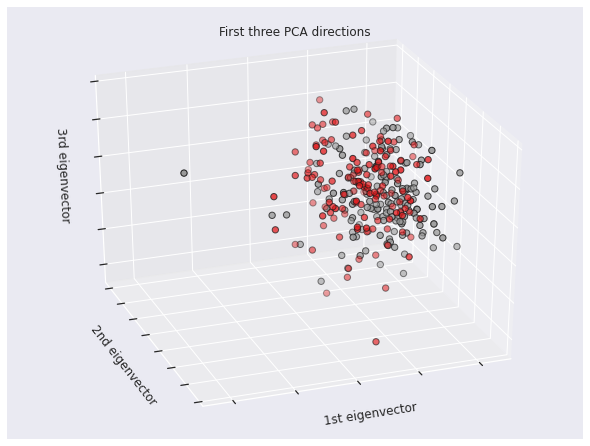

In [41]:
#here we find the 3 most important componenents using scikit learn
#red=more chance of heart attack, grey= less chance. 
#the goal would be to use some ML algo to somehow separate these two groups. 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
principalDF= pd.DataFrame(data=X_reduced,columns=['Component 1','Component 2','Component 3'])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=data.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [35]:
covar_matrix=PCA(n_components=3)
covar_matrix.fit(data)

variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

#This means that the first feature explains about 75% of our variance! This is a really strong predictor of heart attacks. 
#Using all 3 of these new PCA features, we can explain 98.3% of the variance in our data, which is good. 

array([74.8, 89.8, 98.3])

In [42]:
#To see what we're working with, here are the principal components! These explain the variability in the data. 
print(principalDF)

     Component 1  Component 2  Component 3
0     -12.267726     2.870002    14.968778
1       2.689662   -39.873863     0.878693
2     -42.950640   -23.639530     1.759624
3     -10.945206   -28.441101    -7.043844
4     106.978583   -15.879436   -14.862019
..           ...          ...          ...
298    -4.553591    27.494199     5.374418
299    16.428494    12.925387   -25.582195
300   -51.963290    13.329155    15.487471
301  -114.755392    36.439808     0.127538
302   -10.395712   -23.296238     2.393497

[303 rows x 3 columns]
